In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from IPython import display
%matplotlib inline

In [80]:
def Spectrum (E_L, E_C, E_J, filename):
    
    N= 800
    h = 0.04
    h2=h**2;
    b=h2/12;
    a=0.1;
    precision=9
    
    E=0 
    E_step = 0.1 
    E_step_sign = 1

    eigenfunctions=[]
    eigenvalues=[]

    file = open(filename, "w+")
    file.close()
    
    lastsign=0; #

    nextVal=False

    phi = []
    phi.append(-6)
    for j in range(300):
        phi.append(phi[j] + 0.04) 

    for l in range(len(phi)):
        eigenfunctions = []
        E = 0
        def V(x):
            V = E_L * (x)**2 / 2 - E_J * np.cos(x + phi[l])
            return V

        def G(x,E):
            return (E-V(x))/(4*E_C)

        exit=False 
        p = 0
        while (not exit):

            x = np.zeros(N, dtype=np.float64)
            y = np.zeros(N, dtype=np.float64)    
            k = np.zeros(N, dtype=np.float64) 
            i = 0
            y[i] = 0
            x[i] = -N/2*h
            k[i] = G(x[i],E)
            y[i+1] = a
            x[i+1] = x[i]+h
            k[i+1] = G(x[i+1],E)
            i+=1    

            while(i < N-1):
                x[i+1] = x[i] + h
                k[i+1] = G(x[i+1], E)
                y[i+1] = (2*(1-5*b*k[i])*y[i]-(1+b*k[i-1])*y[i-1])/(1+b*k[i+1]) 
                i+=1


            #Проверяем знак волновой функции в последней точке, чтобы убедиться, что на бесконечности она равна нулю. 
            #Если знак при переходе от одной итерации к другой изменяется, то мы сужаем интервал энергии в два раза.

            sign = y[-1] / abs(y[-1])
            if (lastsign == 0):
                lastsign = sign
            elif (sign != lastsign):
                lastsign = sign
                E_step_sign = E_step_sign*(-1)
                E_step = E_step / 2       
                if E_step < 10**(-precision):
                    nextVal=True
                    p = p + 1

            #Если расстояние от 0 последнего шага точки меньше  заданной точности, и мы начинаем поиск следующего решения.
            if abs(y[-1])<10*a:
                nextVal=True
                p = p + 1

            if nextVal:
                eigenvalues.append(E)
                eigenfunctions.append(y)
                E_step=0.1
                E_step_sign=1
                lastsign=0
                nextVal=False 
                if len(eigenfunctions) >= 4:
                    exit=True

            E += E_step_sign*E_step
    
            
    with open(filename, 'w') as fp:
        for item in eigenvalues:
            fp.write("%s\n" % item)
    

In [87]:
Spectrum(0.5, 20, 10, "8-7_10.txt")

In [103]:
def Graph(filename):
    
    with open(filename, 'r') as file:
        S = [line.strip() for line in file]
    eigenvalues = [float(x) for x in S]
    
    phi = []
    phi.append(-6)
    for j in range(300):
        phi.append(phi[j] + 0.04) 
        
    eigenvalues0 = []
    eigenvalues1 = []
    eigenvalues2 = []
    eigenvalues3 = []

    for i in range(len(eigenvalues)):
            if i % 4 == 0:
                 eigenvalues0.append(eigenvalues[i])
            if ((i + 3) % 4 == 0):
                 eigenvalues1.append(eigenvalues[i])
            if ((i + 2) % 4 == 0):
                 eigenvalues2.append(eigenvalues[i])
            if ((i + 1) % 4 == 0):
                 eigenvalues3.append(eigenvalues[i])    
                    
    transitions1 = []
    transitions2 = []
    transitions3 = []

    for i in range(len(eigenvalues0)):
        transitions1.append(eigenvalues1[i] - eigenvalues0[i])
        transitions2.append(eigenvalues2[i] - eigenvalues0[i])
        transitions3.append(eigenvalues3[i] - eigenvalues0[i])
    
    plt.figure(figsize=(13, 9.1))
    plt.plot(phi, eigenvalues0, marker='', linestyle='-', c = 'g', label='0')
    plt.plot(phi, eigenvalues1, marker='', linestyle='-', c = 'b', label='1')
    plt.plot(phi, eigenvalues2, marker='', linestyle='-', c = 'r', label='2')
    plt.plot(phi, eigenvalues3, marker='', linestyle='-', c = 'purple', label='3')
    plt.grid()
    plt.xlabel("Внешний поток", fontsize=15)
    plt.ylabel("Энергия состояния", fontsize=15)
    plt.legend()
    
    plt.figure(figsize=(13, 9.1))
    plt.plot(phi, transitions1, marker='', linestyle='-', c = 'b', label='0-1')
    plt.plot(phi, transitions2, marker='', linestyle='-', c = 'r', label='0-2')
    plt.plot(phi, transitions3, marker='', linestyle='-', c = 'purple', label='0-3')
    plt.grid()
    plt.xlabel("Внешний поток", fontsize=15)
    plt.ylabel("Энергия перехода", fontsize=15)
    plt.legend()
    

In [97]:
Spectrum(0.5, 20, 10, "20-10_1.txt")

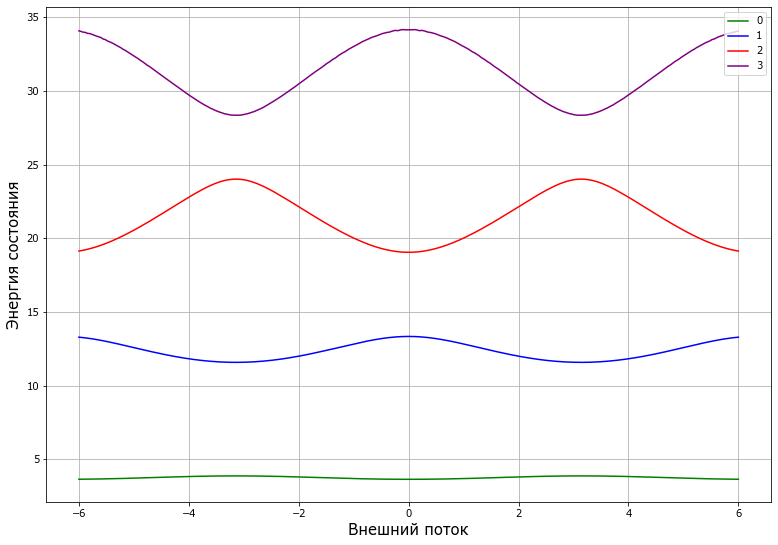

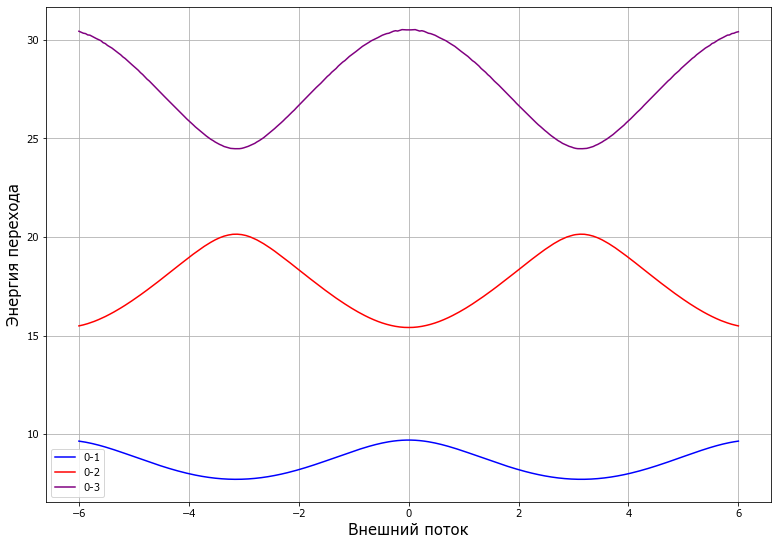

In [104]:
Graph("20-10_1.txt")